In [36]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [37]:
import numpy as np
import pandas as pd

In [38]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [39]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [40]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [41]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables, means start mappig from engine
Base.prepare(engine, reflect=True)

In [42]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [43]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [44]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [45]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [46]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [47]:
# date 1 year ago from today
year_ago = dt.date.today() - dt.timedelta(days=730)
year_ago

datetime.date(2016, 8, 5)

In [48]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
sel=[Measurement.date,
     Measurement.tobs]
day_prcp=session.query(*sel).filter((Measurement.date>year_ago)).all()
day_prcp

[('2016-08-06', 80.0),
 ('2016-08-07', 77.0),
 ('2016-08-08', 81.0),
 ('2016-08-09', 80.0),
 ('2016-08-10', 80.0),
 ('2016-08-11', 80.0),
 ('2016-08-12', 79.0),
 ('2016-08-13', 79.0),
 ('2016-08-14', 79.0),
 ('2016-08-15', 79.0),
 ('2016-08-16', 80.0),
 ('2016-08-17', 78.0),
 ('2016-08-18', 80.0),
 ('2016-08-19', 77.0),
 ('2016-08-20', 80.0),
 ('2016-08-21', 76.0),
 ('2016-08-22', 77.0),
 ('2016-08-23', 81.0),
 ('2016-08-24', 79.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 79.0),
 ('2016-08-27', 77.0),
 ('2016-08-28', 78.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 79.0),
 ('2016-08-31', 80.0),
 ('2016-09-01', 81.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 79.0),
 ('2016-09-04', 75.0),
 ('2016-09-05', 79.0),
 ('2016-09-06', 76.0),
 ('2016-09-07', 76.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 78.0),
 ('2016-09-11', 76.0),
 ('2016-09-12', 78.0),
 ('2016-09-13', 78.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 80.0),
 ('2016-09-17', 79.0),
 ('2016-09-

In [59]:
fff=[]
for rr in day_prcp:
    row22={}
    row22['date']=rr[0]
    row22['Temp']=rr[1]
    fff.append(row22)
fff    

[{'Temp': 80.0, 'date': '2016-08-06'},
 {'Temp': 77.0, 'date': '2016-08-07'},
 {'Temp': 81.0, 'date': '2016-08-08'},
 {'Temp': 80.0, 'date': '2016-08-09'},
 {'Temp': 80.0, 'date': '2016-08-10'},
 {'Temp': 80.0, 'date': '2016-08-11'},
 {'Temp': 79.0, 'date': '2016-08-12'},
 {'Temp': 79.0, 'date': '2016-08-13'},
 {'Temp': 79.0, 'date': '2016-08-14'},
 {'Temp': 79.0, 'date': '2016-08-15'},
 {'Temp': 80.0, 'date': '2016-08-16'},
 {'Temp': 78.0, 'date': '2016-08-17'},
 {'Temp': 80.0, 'date': '2016-08-18'},
 {'Temp': 77.0, 'date': '2016-08-19'},
 {'Temp': 80.0, 'date': '2016-08-20'},
 {'Temp': 76.0, 'date': '2016-08-21'},
 {'Temp': 77.0, 'date': '2016-08-22'},
 {'Temp': 81.0, 'date': '2016-08-23'},
 {'Temp': 79.0, 'date': '2016-08-24'},
 {'Temp': 80.0, 'date': '2016-08-25'},
 {'Temp': 79.0, 'date': '2016-08-26'},
 {'Temp': 77.0, 'date': '2016-08-27'},
 {'Temp': 78.0, 'date': '2016-08-28'},
 {'Temp': 78.0, 'date': '2016-08-29'},
 {'Temp': 79.0, 'date': '2016-08-30'},
 {'Temp': 80.0, 'date': '

In [51]:
resultsfff = session.query(Measurement.date, func.avg(Measurement.tobs), func.max(Measurement.tobs), func.min(Measurement.tobs)).\
        filter(Measurement.date == '2017-08-07').all()
resultsfff        

[('2017-08-07', 80.5, 83.0, 78.0)]

In [33]:
#create json for flak
sel_tobs_result=session.query(Station.name,Measurement.date,Measurement.tobs).filter(Measurement.date>year_ago).all()
sel_tobs_result
station_tob_list=[]
for result in sel_tobs_result:
    row={}
    row['name']=result[0]
    row['date']=result[1]
    row['tobs']=result[2]
    station_tob_list.append(row)
station_tob_list    

[{'date': '2016-08-06', 'name': 'WAIKIKI 717.2, HI US', 'tobs': 80.0},
 {'date': '2016-08-06', 'name': 'KANEOHE 838.1, HI US', 'tobs': 80.0},
 {'date': '2016-08-06',
  'name': 'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  'tobs': 80.0},
 {'date': '2016-08-06', 'name': 'PEARL CITY, HI US', 'tobs': 80.0},
 {'date': '2016-08-06', 'name': 'UPPER WAHIAWA 874.3, HI US', 'tobs': 80.0},
 {'date': '2016-08-06',
  'name': 'WAIMANALO EXPERIMENTAL FARM, HI US',
  'tobs': 80.0},
 {'date': '2016-08-06', 'name': 'WAIHEE 837.5, HI US', 'tobs': 80.0},
 {'date': '2016-08-06',
  'name': 'HONOLULU OBSERVATORY 702.2, HI US',
  'tobs': 80.0},
 {'date': '2016-08-06', 'name': 'MANOA LYON ARBO 785.2, HI US', 'tobs': 80.0},
 {'date': '2016-08-07', 'name': 'WAIKIKI 717.2, HI US', 'tobs': 77.0},
 {'date': '2016-08-07', 'name': 'KANEOHE 838.1, HI US', 'tobs': 77.0},
 {'date': '2016-08-07',
  'name': 'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  'tobs': 77.0},
 {'date': '2016-08-07', 'name': 'PEARL CITY, HI US', 'tobs'

In [23]:
sel_station=[Station.station,
             Station.name,
             Station.latitude,
             Station.longitude,
             Station.elevation]
station_qu=session.query(*sel_station).all()  
station_qu

[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [32]:
##create json list for flask
station_list = []
for result in station_qu:
        row = {}
        row['name'] = result[0]
        row['station'] = result[1]
        row['latitude'] = result[2]
        row['longitude'] = result[3]
        row['elevation'] = result[4]
        station_list.append(row)
station_list        

[{'elevation': 3.0,
  'latitude': 21.2716,
  'longitude': -157.8168,
  'name': 'USC00519397',
  'station': 'WAIKIKI 717.2, HI US'},
 {'elevation': 14.6,
  'latitude': 21.4234,
  'longitude': -157.8015,
  'name': 'USC00513117',
  'station': 'KANEOHE 838.1, HI US'},
 {'elevation': 7.0,
  'latitude': 21.5213,
  'longitude': -157.8374,
  'name': 'USC00514830',
  'station': 'KUALOA RANCH HEADQUARTERS 886.9, HI US'},
 {'elevation': 11.9,
  'latitude': 21.3934,
  'longitude': -157.9751,
  'name': 'USC00517948',
  'station': 'PEARL CITY, HI US'},
 {'elevation': 306.6,
  'latitude': 21.4992,
  'longitude': -158.0111,
  'name': 'USC00518838',
  'station': 'UPPER WAHIAWA 874.3, HI US'},
 {'elevation': 19.5,
  'latitude': 21.33556,
  'longitude': -157.71139,
  'name': 'USC00519523',
  'station': 'WAIMANALO EXPERIMENTAL FARM, HI US'},
 {'elevation': 32.9,
  'latitude': 21.45167,
  'longitude': -157.84888999999998,
  'name': 'USC00519281',
  'station': 'WAIHEE 837.5, HI US'},
 {'elevation': 0.9,
  '

In [58]:
cal_sql=[Measurement.date,
             func.min(Measurement.tobs),
             func.avg(Measurement.tobs),
             func.max(Measurement.tobs)]
cal_max_min_avg_result=session.query(*cal_sql).filter(Measurement.date>='2017-08-02',Measurement.date<='2017-08-08').group_by(Measurement.date).all()
    #convert to json object
cal_max_min_avg_result    

[('2017-08-02', 73.0, 79.0, 83.0),
 ('2017-08-03', 76.0, 79.0, 81.0),
 ('2017-08-04', 77.0, 80.0, 82.0),
 ('2017-08-05', 77.0, 80.0, 82.0),
 ('2017-08-06', 79.0, 81.4, 83.0),
 ('2017-08-07', 78.0, 80.5, 83.0),
 ('2017-08-08', 74.0, 78.5, 82.0)]

In [61]:
temp_comp=[]
for result in cal_max_min_avg_result:
        row = {}
        row['Date']=result[0]
        row['Min Temperature']=result[1]
        row['Avg Temperature']=result[2]
        row['Max Temperature']=result[3]
        temp_comp.append(row)
temp_comp

[{'Avg Temperature': 79.0,
  'Date': '2017-08-02',
  'Max Temperature': 83.0,
  'Min Temperature': 73.0},
 {'Avg Temperature': 79.0,
  'Date': '2017-08-03',
  'Max Temperature': 81.0,
  'Min Temperature': 76.0},
 {'Avg Temperature': 80.0,
  'Date': '2017-08-04',
  'Max Temperature': 82.0,
  'Min Temperature': 77.0},
 {'Avg Temperature': 80.0,
  'Date': '2017-08-05',
  'Max Temperature': 82.0,
  'Min Temperature': 77.0},
 {'Avg Temperature': 81.4,
  'Date': '2017-08-06',
  'Max Temperature': 83.0,
  'Min Temperature': 79.0},
 {'Avg Temperature': 80.5,
  'Date': '2017-08-07',
  'Max Temperature': 83.0,
  'Min Temperature': 78.0},
 {'Avg Temperature': 78.5,
  'Date': '2017-08-08',
  'Max Temperature': 82.0,
  'Min Temperature': 74.0}]

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
sel=[Measurement.date,
     func.sum(Measurement.prcp)]
day_prcp=session.query(*sel).filter((Measurement.date>='2016-08-04')).filter((Measurement.date<'2017-08-04')).group_by(Measurement.date).all()


In [193]:
df_d=pd.DataFrame(day_prcp,columns=['date','Prcp'])
df_d['date'].head()

0    2016-08-04
1    2016-08-05
2    2016-08-06
3    2016-08-07
4    2016-08-08
Name: date, dtype: object

<IPython.core.display.Javascript object>


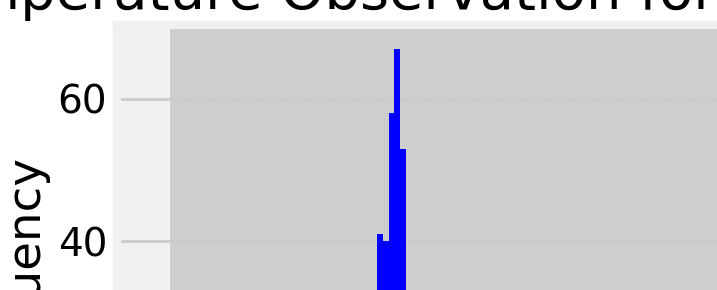

In [194]:
Precipitation,=plt.plot(df_d['date'], df_d['Prcp'],label='precipitation')
plt.tight_layout()
#plt.savefig("date_Fre.png")
plt.show()

In [195]:
# Add labels to X and Y axes :: Add title
plt.title("homework")
plt.xlabel("Date")
plt.ylabel("Prcp")

Text(33.7985,0.5,'Prcp')

In [196]:
# Create a legend for the chart
plt.legend(handles=[Precipitation], loc="best")
plt.savefig("date_Fre.png")

In [197]:


# date 1 year ago from today
year_ago = dt.date.today() - dt.timedelta(days=365)
year_ago





datetime.date(2017, 8, 5)

In [198]:
# Design a query to retrieve precipitation data and plot the results
sel1=[Measurement.date,
     func.sum(Measurement.prcp)]
all_prcp=session.query(*sel1).group_by(Measurement.date).all()




In [199]:
#create dataframe
df_all=pd.DataFrame(all_prcp,columns=['date','Prcp'])
df_all.head()

,date,Prcp
0,2010-01-01,1.06
1,2010-01-02,0.02
2,2010-01-03,0.00
3,2010-01-04,0.01
4,2010-01-05,0.03


In [200]:
#all data's statistics for the precipitation data
df_all.describe()

,Prcp
count,2792.000000
mean,1.041594
std,2.224333
min,0.000000
25%,0.060000
50%,0.380000
75%,1.130000
max,37.410000


In [201]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_d.describe()

,Prcp
count,365.000000
mean,1.031753
std,1.794462
min,0.000000
25%,0.060000
50%,0.420000
75%,1.150000
max,14.280000


In [202]:

# Design a query to retrieve data from Station matadata table data
sel2=[Station.name,
     func.count(Station.name)]
station_count=session.query(*sel2).group_by(Station.name).all()
nb_st=len(station_count)
print(f"The total numbers of available statations is {nb_st} ")
#session.query(func.count(User.id)).scalar() 

The total numbers of available statations is 9 


In [203]:
# show the Station table
sel_all=[Station.id,
         Station.station,
         Station.name,
         Station.latitude,
         Station.longitude,
         Station.elevation]
sel_all_station=session.query(*sel_all).all()
station_df=pd.DataFrame(sel_all_station,columns=['id','Station','name','latitude','longitude','elevation'])
station_df

,id,Station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [204]:
sel_measure=[Measurement.id,
             Measurement.station,
             Measurement.date,
             Measurement.prcp,
             Measurement.tobs]
#return list from session.query
sel_all_measure=session.query(*sel_measure).all()
measure_df=pd.DataFrame(sel_all_measure,columns=['id','station','date','prcp','tobs'])
measure_df.head()                   

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [205]:
# U# What are the most active stations?
# List the stations and the counts in descending order.
#define the query
act_sta_sel=[
             Measurement.station,
             func.count(Measurement.station)]
#use session to query 
count_station=session.query(*act_sta_sel).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
count_station_df=pd.DataFrame(count_station,columns=['station','Count_station'])
activate_station_id=count_station_df.iloc[0].station
#count_station_df
count_station
#activate_station_id
   

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [206]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sel_measure1=[
             Measurement.station,
             func.min(Measurement.tobs),
             func.max(Measurement.tobs),
             func.avg(Measurement.tobs)]
#return list from session.query
sel_all_measure1=session.query(*sel_measure1).filter(Measurement.station==activate_station_id).group_by(Measurement.station).all()
#measure_df1=pd.DataFrame(sel_all_measure1,columns=['station','lowest Temp','Highest Temp','Average'])
sel_all_measure1

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [207]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#get the station name with the highest numner of temperature 

max_tobs_station=session.query(Measurement.tobs).\
filter(Measurement.station==activate_station_id,(Measurement.date<'2017-08-04'),(Measurement.date>='2016-08-04')).all()


[(77.0),
 (81.0),
 (78.0),
 (78.0),
 (81.0),
 (81.0),
 (82.0),
 (80.0),
 (76.0),
 (80.0),
 (76.0),
 (75.0),
 (74.0),
 (82.0),
 (80.0),
 (79.0),
 (81.0),
 (79.0),
 (78.0),
 (77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 

In [208]:
len(max_tobs_station)

362

In [209]:
print(max_tobs_station[0][0])

77.0


In [210]:
tobs_t = [temp[0] for temp in max_tobs_station]

<IPython.core.display.Javascript object>


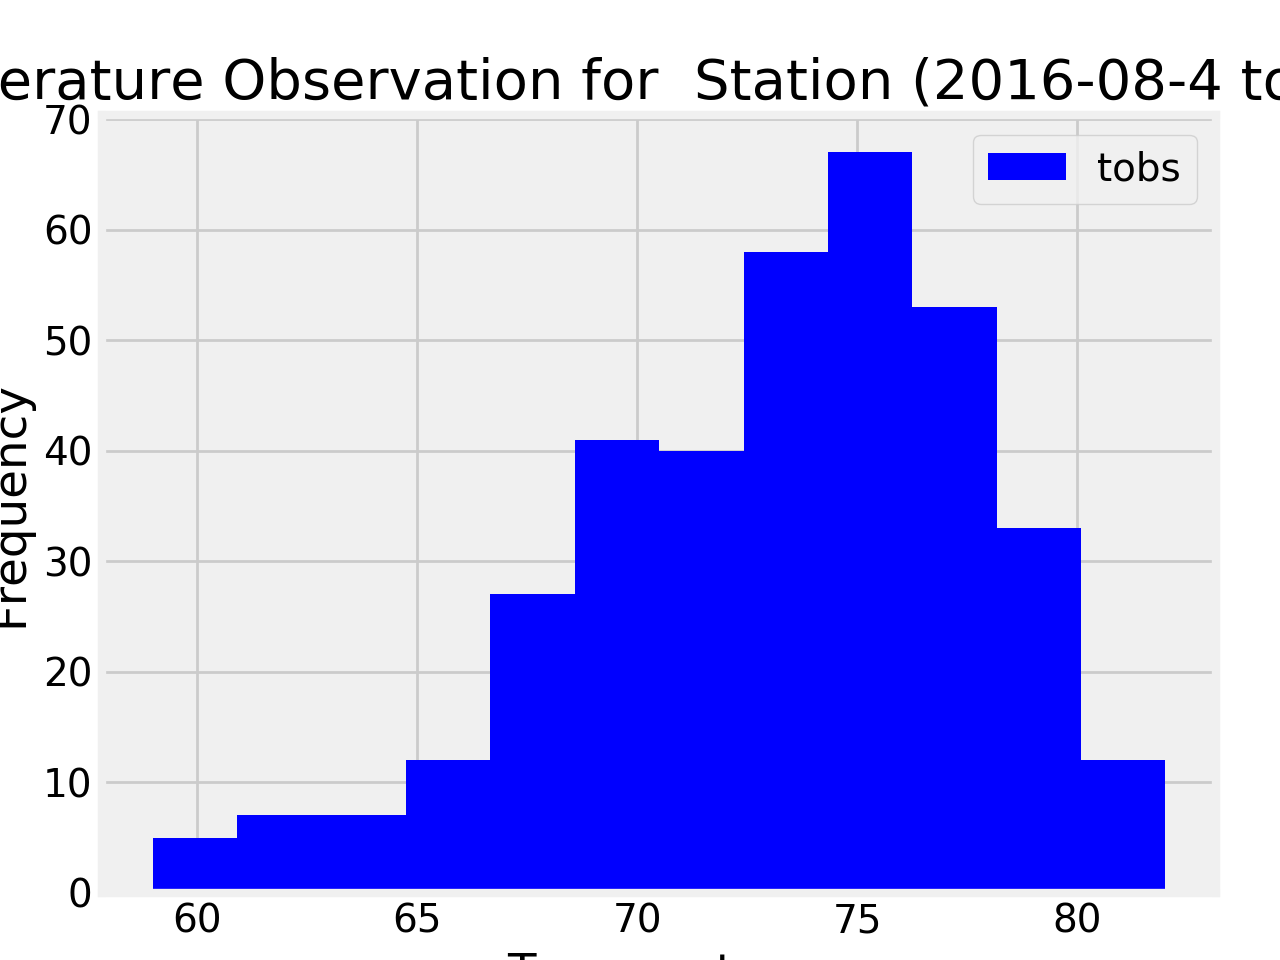

In [212]:
plt.hist(tobs_t, bins=12, color='b')
plt.title("Temperature Observation for  Station (2016-08-4 to 2017)")
plt.ylabel('Frequency')
plt.xlabel('Temperature')
labels = ['tobs']
plt.legend(labels)
plt.savefig("fig2.png")
plt.show()

In [130]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

In [132]:
result=calc_temps('2017-01-01','2017-05-23')

In [214]:
def calc_temps1(start_date, end_date):
    query = session.query(Measurement.tobs).filter(Measurement.date>=start_date, Measurement.date<=end_date).all()
    temper = [temp[0] for temp in query]
    avg_temp = np.mean(temper)
    lowest_temp = min(temper)
    highest_temp = max(temper)
    

    plt.figure(figsize=(3,5))
    plt.bar(1, avg_temp, yerr=(highest_temp - lowest_temp), tick_label='', color='pink')
    plt.ylabel("Temperature", weight="bold")
    plt.title("Average Trip Temperature", weight="bold")
    plt.savefig("Fig3.png")
    plt.show()

<IPython.core.display.Javascript object>


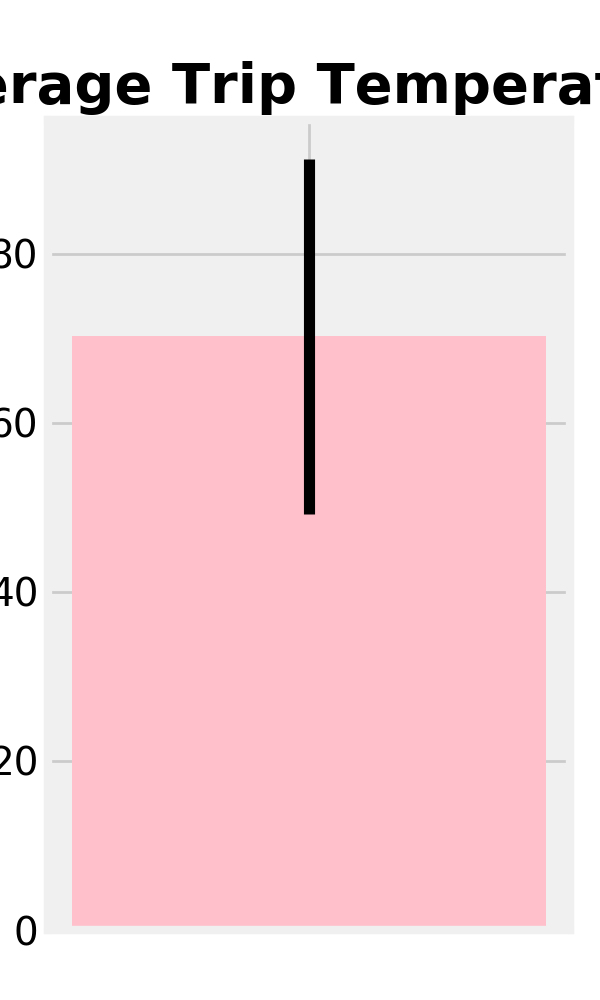

In [215]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps1('2017-01-17','2017-03-03')

In [218]:
#this is optional. i will do it if i have time later today

# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.

# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall_sql=[Measurement.station,
              func.sum(Measurement.prcp)]
rainfal_station=session.query(*rainfall_sql).filter(Measurement.date>='2016-08-05').filter(Measurement.date<='2017-08-05').group_by(Measurement.station).all()

rainfal_station

[('USC00513117', 51.20000000000003),
 ('USC00514830', 33.81),
 ('USC00516128', 154.87000000000006),
 ('USC00517948', 4.619999999999999),
 ('USC00519281', 74.41000000000001),
 ('USC00519397', 17.04999999999999),
 ('USC00519523', 38.940000000000005)]